These are the first two nodes: [(375694438, {'y': 46.1360719, 'x': 12.6403763, 'street_count': 3, 'lts': '2', 'message': 'Node LTS is max intersecting LTS', 'lon': 12.6403763, 'lat': 46.1360719}), (4230598315, {'y': 46.1365884, 'x': 12.6423623, 'street_count': 3, 'lts': '1', 'message': 'Node LTS is max intersecting LTS', 'lon': 12.6423623, 'lat': 46.1365884})]
These are the first two edges: [(375694438, 4230598315, {'osmid': 337440000, 'name': ['MV 06'], 'highway': 'cycleway', 'length': 164.637, 'rule': 's3', 'lts': '1', 'slope': '1.6360384809875068', 'slope_class': '0-3: flat', 'message': "This way is a separated path because highway='cycleway'.", 'short_message': 'highway $=$ "cycleway"'}), (375694438, 375694362, {'osmid': 77512100, 'name': ['Via Maniana'], 'highway': 'residential', 'length': 514.414, 'rule': 'm9', 'lts': '2', 'slope': '0.8356706560606451', 'slope_class': '0-3: flat', 'message': "Setting LTS to 2 because maxspeed is up to 50 km/h and lanes are 2 or less and highway='

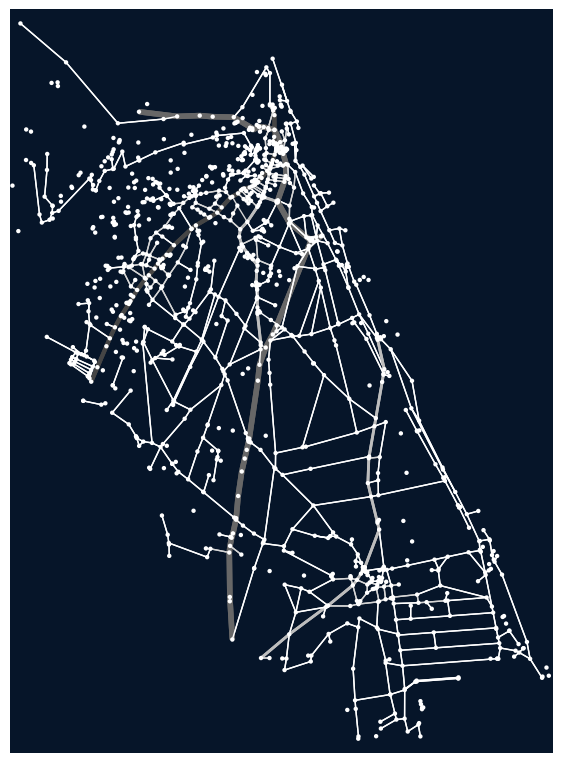

This are the node's attributes  {'y': 46.1360719, 'x': 12.6403763, 'street_count': 3, 'lts': '2', 'message': 'Node LTS is max intersecting LTS', 'lon': 12.6403763, 'lat': 46.1360719}
This are the edge's attributes: {'osmid': 337440000, 'name': ['MV 06'], 'highway': 'cycleway', 'length': 164.637, 'rule': 's3', 'lts': '1', 'slope': '1.6360384809875068', 'slope_class': '0-3: flat', 'message': "This way is a separated path because highway='cycleway'.", 'short_message': 'highway $=$ "cycleway"'}
These are the number of edges for each node: {375694438: 6, 4230598315: 4, 375694362: 6, 375694984: 6, 4537840691: 6, 481334605: 6, 3506974439: 4, 1769453990: 6, 1892343159: 6, 481334637: 6, 481334639: 6, 3545182320: 2, 1894585954: 6, 481334646: 6, 3824639672: 6, 737610454: 6, 3506974552: 4, 1894585978: 6, 912306659: 6, 4144795322: 2, 912298106: 6, 9407403115: 4, 1894585980: 6, 4187438672: 8, 1894586012: 6, 3445307415: 4, 1894586014: 4, 4187439199: 6, 3445307439: 2, 3445307007: 6, 3445307011: 4, 912

In [35]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
filepath = "/Users/leonardo/Desktop/Tesi/LTSBikePlan/data/Montereale_Valcellina_lts.graphml"
G_lts = ox.load_graphml(filepath)
G_lts = ox.project_graph(G_lts, to_crs='EPSG:4326')
crs = G_lts.graph['crs']

# Basic Properties of the graph

## 1. Nodes and Edges
num_nodes = G_lts.number_of_nodes()
num_edges = G_lts.number_of_edges()

nodes = list(G_lts.nodes(data=True))
print("These are the first two nodes:", nodes[:2])
edges = list(G_lts.edges(data=True))
print("These are the first two edges:", edges[:2])

# Define a mapping for highway types to line widths and colors
highway_styles = {
    'motorway': {'linewidth': 5, 'color': "#a6a6a6"},
    'primary': {'linewidth': 4, 'color': "#676767"},
    'secondary': {'linewidth': 3, 'color': "#454545"},
    'tertiary': {'linewidth': 2, 'color': "#bdbdbd"},
    'residential': {'linewidth': 1, 'color': "#d5d5d5"},
    'default': {'linewidth': 1, 'color': "#ffff"} 
}

# Extract edge colors and widths based on the highway attribute
ec = [highway_styles[data['highway']]['color'] if data['highway'] in highway_styles else highway_styles['default']['color'] for _, _, data in G_lts.edges(data=True)]
lw = [highway_styles[data['highway']]['linewidth'] if data['highway'] in highway_styles else highway_styles['default']['linewidth'] for _, _, data in G_lts.edges(data=True)]

# Visualization
bgcolor = "#061529"
fig, ax = ox.plot_graph(G_lts, node_size=10,figsize=(7, 15), 
                        dpi=300, bgcolor=bgcolor,
                        save=False, edge_alpha=1,
                        edge_color=ec, edge_linewidth=lw)

fig.tight_layout(pad=0)

## Extracting Node IDs
node_ids = list(G_lts.nodes())

## Extracting Edge Nodes
edge_nodes = [(edge[0], edge[1]) for edge in edges]

## Node and edge attributes of the first obs.
node_id = node_ids[0]
node_attributes = G_lts.nodes[node_id]
print("This are the node's attributes ",node_attributes)

node1, node2 = edge_nodes[0]
edge_attributes = G_lts[node1][node2][0]
print("This are the edge's attributes:", edge_attributes)

## Degree of Nodes (namely: the number of edges connected to each node)
degrees = dict(G_lts.degree())
print("These are the number of edges for each node:", degrees)

## Function to round values in a dictionary
def round_dict_values(d):
    for key, value in d.items():
        if isinstance(value, float):
            d[key] = round(value, 2)
        elif isinstance(value, dict):
            d[key] = round_dict_values(value)
    return d

## Some stats about the graph
stats = ox.basic_stats(G_lts)

## Print results
print(f'The number of nodes are: {num_nodes}')
print(f'The number of edges are: {num_edges}')
print(f'The average degree is: {round(sum(degrees.values()) / len(degrees), 2)}')
print(round_dict_values(stats))

High-stress nodes: [912306659, 912298106, 9407403115, 3445307007, 912292632, 4417658388, 375694262, 275047641, 6532857567, 912303265, 912298815, 6532722874, 275047646, 1812883495, 3493141395, 1812883498, 912285250, 275047789, 1812888011, 3741329882, 3741329912, 295257285, 275047807, 912298224, 912293688, 912302747, 778888939, 912305093, 275048618, 1902148479, 1902148592, 912298892, 912294208, 912295544, 275048626, 912285611, 912296850, 912305987, 3710631528, 2465682443, 275052691, 3471819403, 2208780228, 912283507, 6514628942, 4109186227, 295279410, 912294506, 2142860777, 912282927, 318694369, 3481947933, 1865801228, 912298234, 912295039, 318694398, 912282520, 912298174, 912289270, 4007156374, 318694413, 912302147, 912296263, 1865801254, 326044370, 326044388, 1711192659, 326044650, 3137433200, 3647507513, 375693963, 912302191, 912311114, 912283315, 1812883484, 912304459, 11020585071, 375694255, 492115024, 912307782, 1812883474, 912303842, 6684822552, 912312119, 402579041, 402579695, 40

/Users/leonardo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


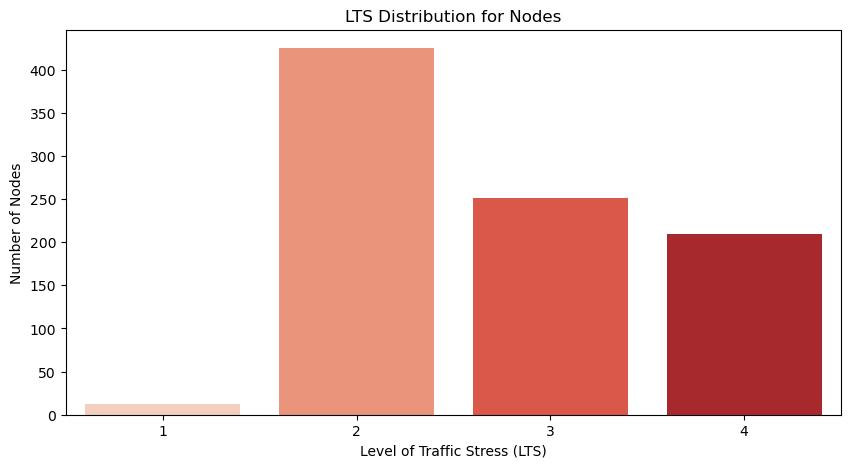

/Users/leonardo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


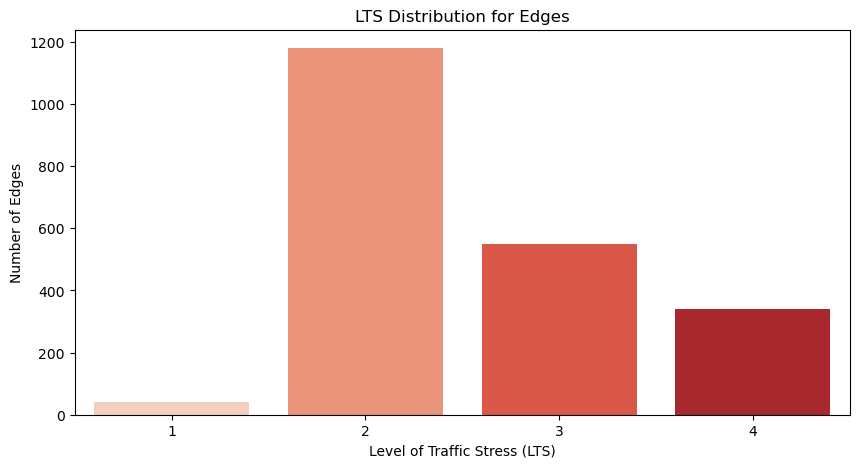

Nodes - Mean LTS: 2.73, Median LTS: 3.0, Standard Deviation: 0.83
Edges - Mean LTS: 2.56, Median LTS: 2.0, Standard Deviation: 0.78


In [36]:
# Geospatial Analysis

## Identify nodes (intersections) with the highest LTS.

## Nodes with highest LTS
high_stress_nodes = [node for node, data in G_lts.nodes(data=True) if 'lts' in data and data['lts'] == '4']

## Identify roads (edges) with the highest LTS.
high_stress_edges = [(u, v) for u, v, data in G_lts.edges(data=True) if 'lts' in data and data['lts'] == '4']

print(f"High-stress nodes: {high_stress_nodes}")
print(f"High-stress edges: {high_stress_edges}")
print(f"Number of high-stress nodes: {len(high_stress_nodes)}")
print(f"Number of high-stress edges: {len(high_stress_edges)}")

## Calculate the average LTS for the entire network.

## Convert LTS values to integers for calculation, ensuring the 'lts' attribute exists
lts_values_nodes = [int(data['lts']) for _, data in G_lts.nodes(data=True) if 'lts' in data]
lts_values_edges = [int(data['lts']) for _, _, data in G_lts.edges(data=True) if 'lts' in data]

## Distribution of the Level of Traffic Stress (LTS) among nodes and edges.
from collections import Counter

## Count the frequency of each LTS value for nodes and edges
lts_node_freq = Counter(lts_values_nodes)
lts_edge_freq = Counter(lts_values_edges)

## Order the Counter objects by their keys
lts_node_freq = dict(sorted(lts_node_freq.items()))
lts_edge_freq = dict(sorted(lts_edge_freq.items()))

print("Ordered LTS distribution for nodes:", lts_node_freq)
print("Ordered LTS distribution for edges:", lts_edge_freq)

## Plot for nodes
plt.figure(figsize=(10, 5))
sns.countplot(lts_values_nodes, palette="Reds", order=sorted(set(lts_values_nodes)))
plt.xlabel('Level of Traffic Stress (LTS)')
plt.ylabel('Number of Nodes')
plt.title('LTS Distribution for Nodes')
plt.show()

## Plot for edges
plt.figure(figsize=(10, 5))
sns.countplot(lts_values_edges, palette="Reds", order=sorted(set(lts_values_edges)))
plt.xlabel('Level of Traffic Stress (LTS)')
plt.ylabel('Number of Edges')
plt.title('LTS Distribution for Edges')
plt.show()

## Descriptive Statistic about LTS - Nodes & Edges
mean_lts_nodes = np.mean(lts_values_nodes)
median_lts_nodes = np.median(lts_values_nodes)
std_dev_lts_nodes = np.std(lts_values_nodes)

mean_lts_edges = np.mean(lts_values_edges)
median_lts_edges = np.median(lts_values_edges)
std_dev_lts_edges = np.std(lts_values_edges)

print(f"Nodes - Mean LTS: {round(mean_lts_nodes,2)}, Median LTS: {round(median_lts_nodes,2)}, Standard Deviation: {round(std_dev_lts_nodes,2)}")
print(f"Edges - Mean LTS: {round(mean_lts_edges,2)}, Median LTS: {round(median_lts_edges,2)}, Standard Deviation: {round(std_dev_lts_edges,2)}")


In [64]:
# Network Analysis

## Calculate centrality measures to identify important nodes (intersections) in the network.

def lts_weighted_degree_centrality(G):
    """Calculate degree centrality weighted by LTS."""
    return {node: G.degree(node) * int(data['lts']) for node, data in G.nodes(data=True) if 'lts' in data}

def lts_weighted_closeness_centrality(G):
    """Calculate closeness centrality weighted by LTS."""
    # Update the graph with the new weighted lengths
    for u, v, data in G.edges(data=True):
        data['lts_weight'] = data['length'] / int(data['lts'])
    return nx.closeness_centrality(G, distance='lts_weight')

def lts_weighted_betweenness_centrality(G):
    """Calculate betweenness centrality weighted by LTS."""
    # Update the graph with the new weighted lengths
    for u, v, data in G.edges(data=True):
        data['lts_weight'] = data['length'] / int(data['lts'])
    return nx.betweenness_centrality(G, weight='lts_weight')


## Calculate degree centrality
degree_centrality = lts_weighted_degree_centrality(G_lts)

## Nodes with highest degree centrality (top 5)
top_degree_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

## Closeness Centrality
closeness_centrality = lts_weighted_closeness_centrality(G_lts)
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
# Round the values of the second term
top_closeness_nodes_rounded = [(node, round(value, 6)) for node, value in top_closeness_nodes]

## Betweenness Centrality
betweenness_centrality = lts_weighted_betweenness_centrality(G_lts)
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness_nodes_rounded = [(node, round(value, 6)) for node, value in top_betweenness_nodes]

print("Nodes with highest degree centrality:", top_degree_nodes)
print("Nodes with highest closeness centrality:", top_closeness_nodes_rounded)
print("Nodes with highest betweenness centrality:", top_betweenness_nodes_rounded)

## Centrality measures for important edges:
def lts_weighted_edge_betweenness_centrality(G):
    """Calculate edge betweenness centrality weighted by LTS."""
    # Update the graph with the new weighted lengths
    for u, v, data in G.edges(data=True):
        data['lts_weight'] = data['length'] / int(data['lts'])
    return nx.edge_betweenness_centrality(G, weight='lts_weight')

## Edge Betweenness Centrality
edge_betweenness_centrality = lts_weighted_edge_betweenness_centrality(G_lts)
top_edge_betweenness = sorted(edge_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_edge_betweenness_rounded = [((u, v), round(value, 6)) for (u, v, *_) , value in top_edge_betweenness]

print("Edges with highest betweenness centrality:", top_edge_betweenness_rounded)

## Identify strongly connected components - SCCs, since graph is directed. A strongly connected component of a directed graph 
## is a maximal strongly connected subgraph.That is, it's a subgraph where every vertex is reachable from every other vertex in the subgraph.

sccs = list(nx.strongly_connected_components(G_lts))
print(f"Number of Strongly Connected Components: {len(sccs)}")

## High-Stress Subgraphs: Identify subgraphs (connected components) of the network that have a high average LTS (LTS = 4). 
## This can help in pinpointing areas that are particularly stressful for cyclists or pedestrians.

# First, create a subgraph with only edges having LTS = 4
high_stress_edges = [(u, v, k) for u, v, k, d in G_lts.edges(keys=True, data=True) if 'lts' in d and d.get('lts') == '4']
G_high_stress = G_lts.edge_subgraph(high_stress_edges)

# Then, identify the connected components of this subgraph
high_stress_subgraphs = list(nx.strongly_connected_components(G_high_stress))
print(f"Number of High-Stress Subgraphs: {len(high_stress_subgraphs)}")


Nodes with highest degree centrality: [(912298892, 32), (318694398, 32), (912296263, 32), (375693963, 32), (912303842, 32)]
Nodes with highest closeness centrality: [(295279410, 0.00055), (2980754259, 0.000549), (912306120, 0.000548), (912289180, 0.000547), (2078574772, 0.000547)]
Nodes with highest betweenness centrality: [(2142859863, 0.15321), (665371479, 0.152969), (5774515722, 0.152044), (1875944482, 0.151747), (665371590, 0.148422)]
Edges with highest betweenness centrality: [((912305827, 665371479), 0.079024), ((665371479, 5774515722), 0.078355), ((5774515722, 1875944482), 0.078101), ((1875944482, 2142859863), 0.077995), ((2142859863, 665371590), 0.075532)]
Number of Strongly Connected Components: 327
Number of High-Stress Subgraphs: 42
{2465682443, 3471819403, 912298892, 1865801228, 318694413, 912297744, 912310417, 275052691, 4007156374, 912282520, 912302747, 3481947933, 5808412702, 1865801254, 2100239527, 912303399, 275047807, 275048618, 912285611, 778889005, 912282927, 275048

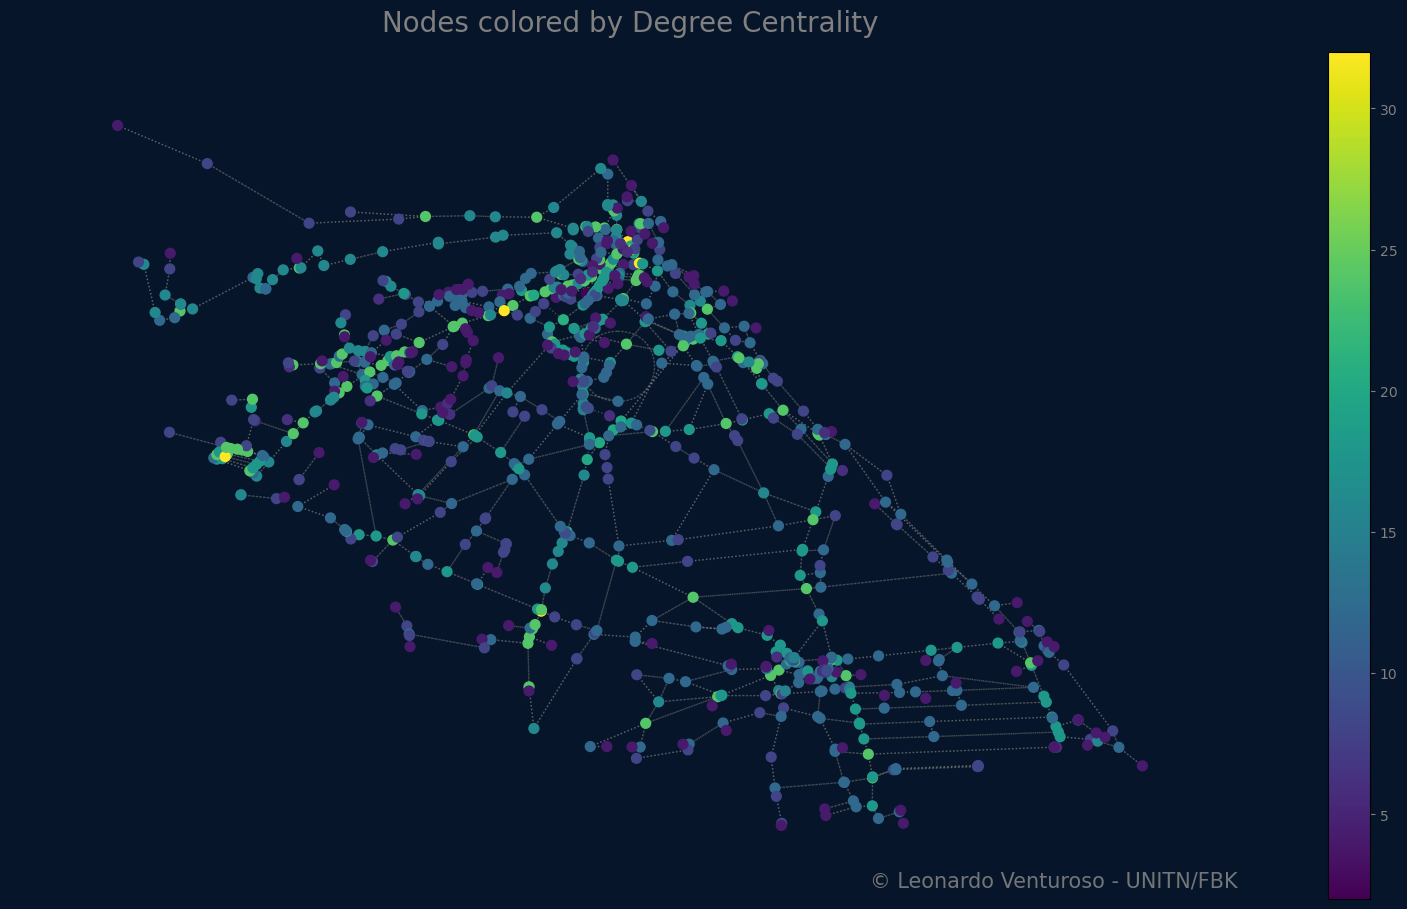

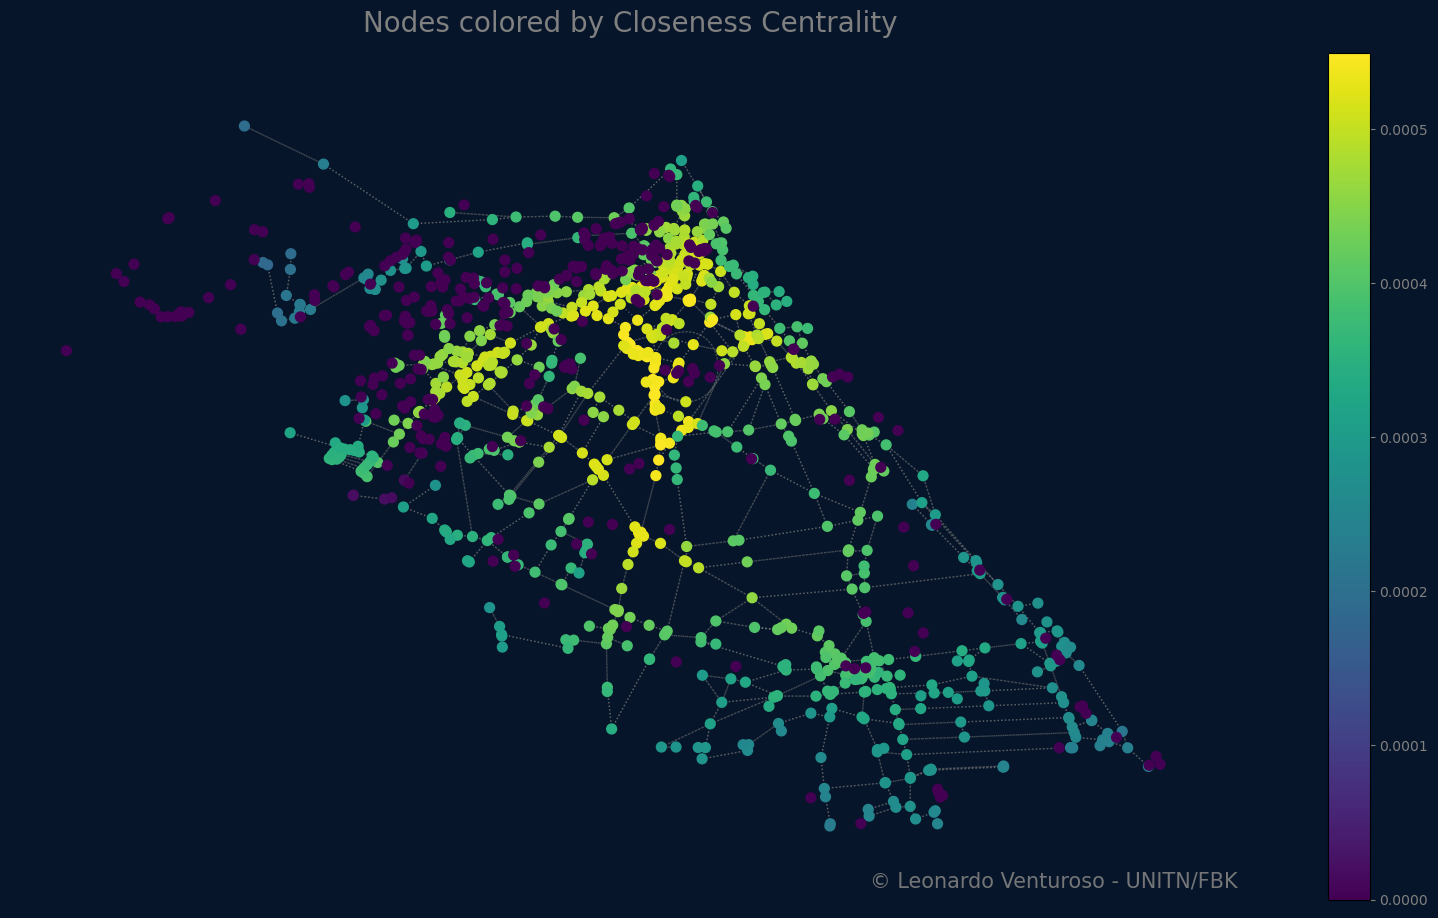

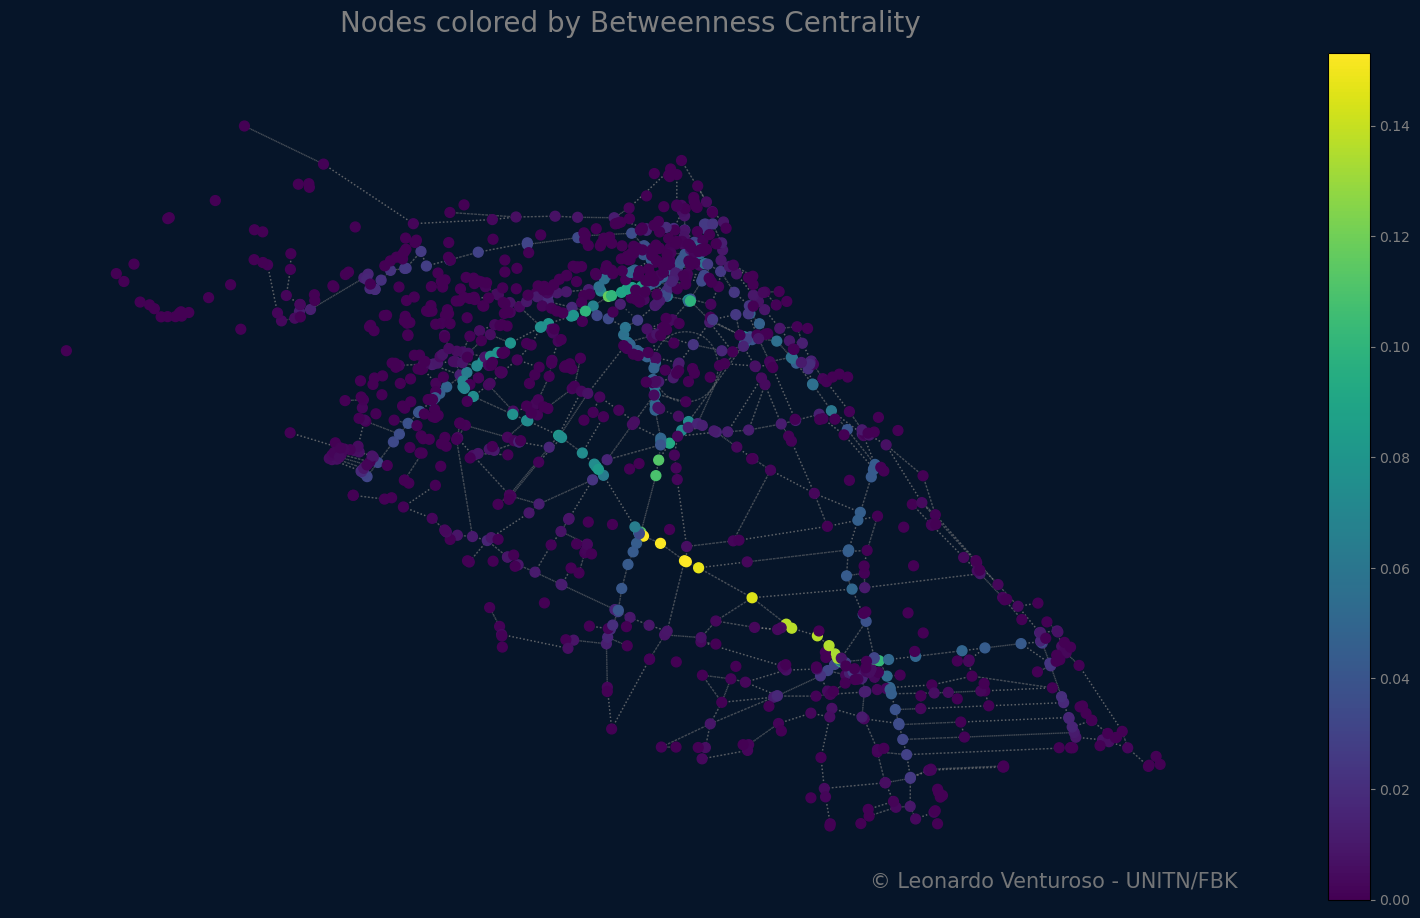

In [41]:
## Graphs for viz of centrality

def draw_graph(G, centrality_values, title):
    # Filter out nodes that don't have centrality values
    nodes_to_include = [node for node in G.nodes() if node in centrality_values]
    subgraph = G.subgraph(nodes_to_include)
    
    # Use geographical coordinates for positioning
    pos = {node: (data['x'], data['y']) for node, data in subgraph.nodes(data=True)}
    
    node_colors = [centrality_values[node] for node in subgraph.nodes()]
    
    # Figure setup
    fig, ax = plt.subplots(figsize=(20,11))
    ax.set_facecolor("#061529")
    fig.set_facecolor("#061529")
    
    # Color scale
    cmap = plt.cm.viridis
    vmin = min(node_colors)
    vmax = max(node_colors)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = plt.colorbar(sm)
    cbar.ax.yaxis.set_tick_params(color='grey')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='grey')
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G=subgraph, pos=pos, node_color=node_colors, cmap=cmap, alpha=1, node_size=50)
    nx.draw_networkx_edges(G=subgraph, pos=pos, edge_color='grey', style="dotted", alpha=0.5, arrows=False)
    
    # Labeling Axes
    ax.set_title(title, fontdict={"fontsize":20, "color": "grey"}, pad=15)
    ax.axis('off')
    

    # Watermark
    ax.text(0.99, 0.01, '© Leonardo Venturoso - UNITN/FBK',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)
    
    plt.show()

## Visualize nodes based on Degree Centrality
draw_graph(G_lts, degree_centrality, 'Nodes colored by Degree Centrality')

## Visualize nodes based on Closeness Centrality
draw_graph(G_lts, closeness_centrality, 'Nodes colored by Closeness Centrality')

## Visualize nodes based on Betweenness Centrality
draw_graph(G_lts, betweenness_centrality, 'Nodes colored by Betweenness Centrality')

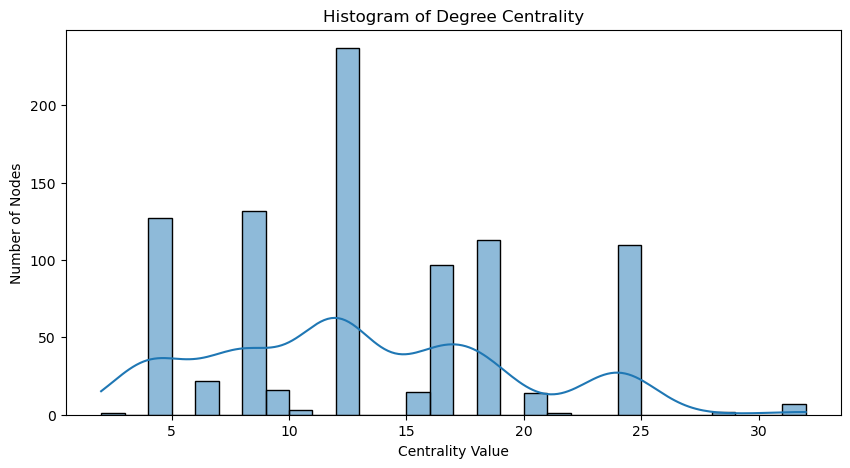

/Users/leonardo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


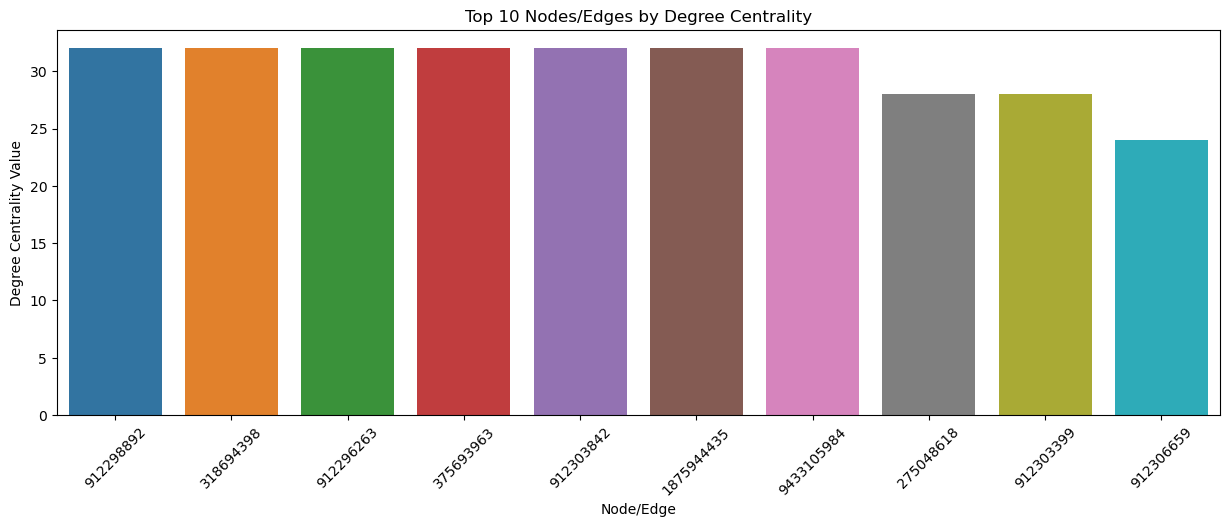

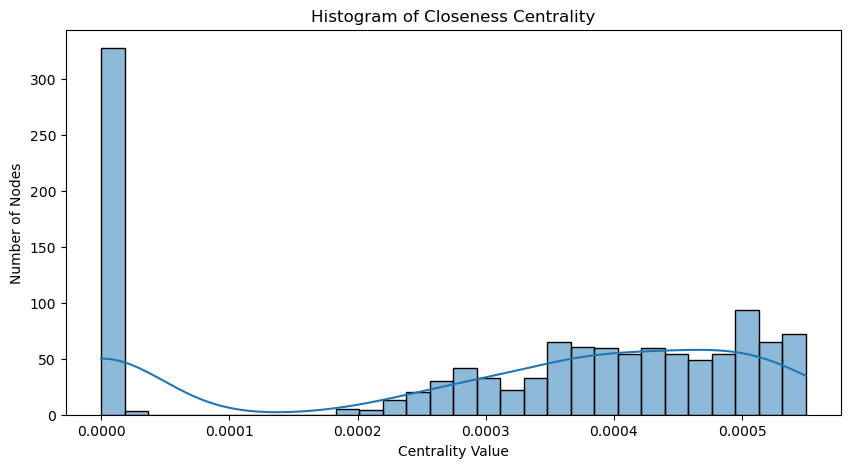

/Users/leonardo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


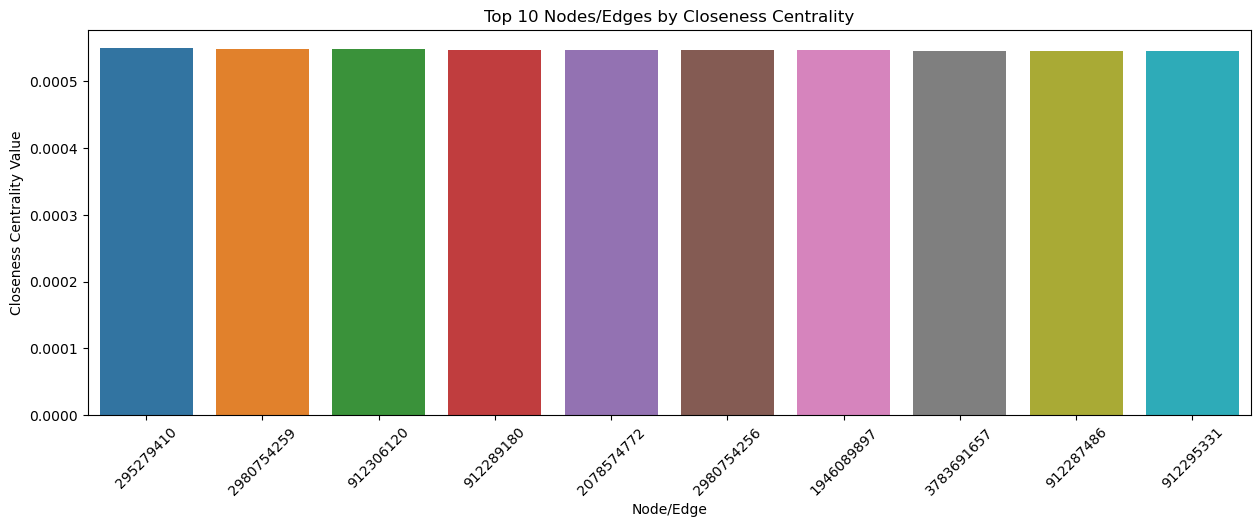

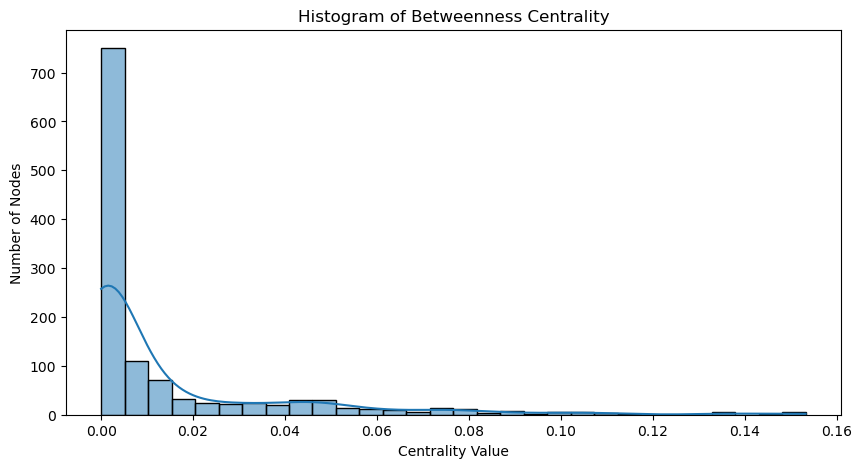

/Users/leonardo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


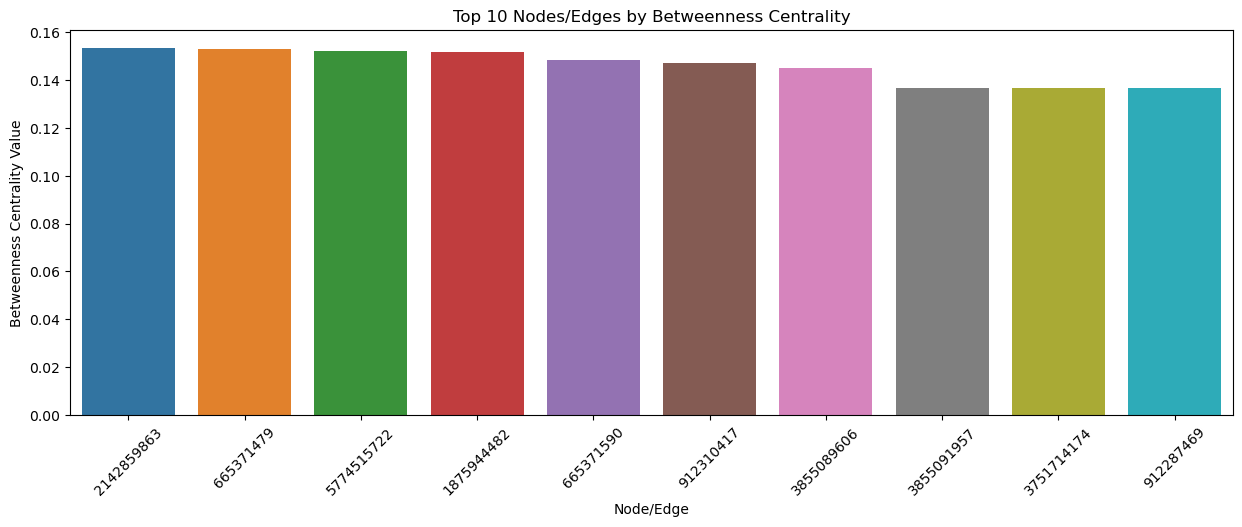

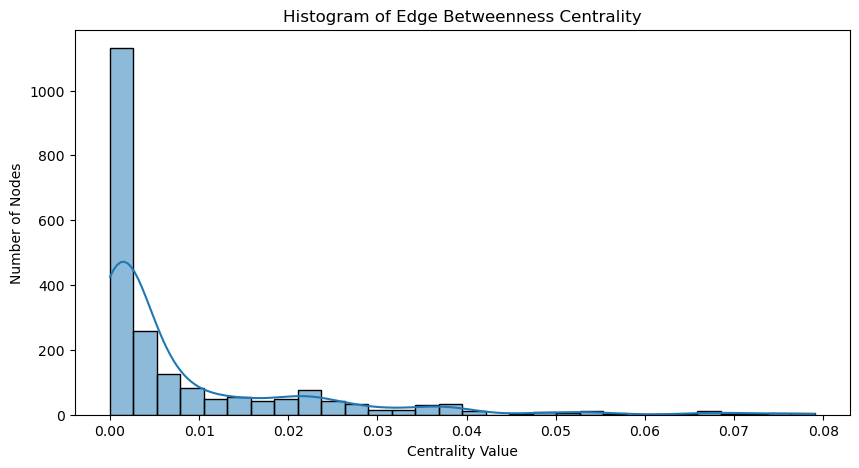

/Users/leonardo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


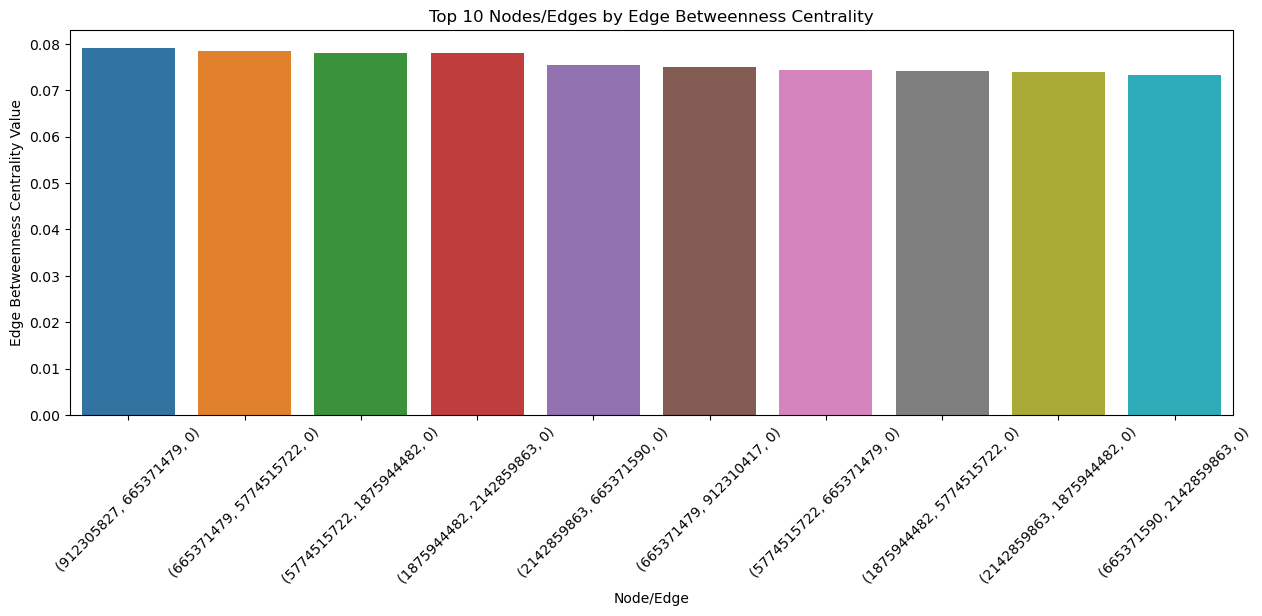

In [42]:
## Histograms for viz of centrality measures to understand the distribution of centrality scores across nodes.
## Bar plots for the top nodes in each centrality measure.

## Function to visualize centrality measures
def visualize_centrality(centrality_values, title):
    ## Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(list(centrality_values.values()), bins=30, kde=True)
    plt.title(f'Histogram of {title}')
    plt.xlabel('Centrality Value')
    plt.ylabel('Number of Nodes')
    plt.show()

    ## Bar plot for top nodes
    top_nodes = sorted(centrality_values.items(), key=lambda x: x[1], reverse=True)[:10]
    nodes, values = zip(*top_nodes)
    
    # Convert nodes (which can be tuples for edges) to strings for visualization
    nodes = [str(node) for node in nodes]
    
    plt.figure(figsize=(15, 5))
    sns.barplot(list(nodes), list(values))
    plt.title(f'Top 10 Nodes/Edges by {title}')
    plt.xlabel('Node/Edge')
    plt.ylabel(f'{title} Value')
    plt.xticks(rotation=45)
    plt.show()

## Visualize Degree Centrality
visualize_centrality(degree_centrality, 'Degree Centrality')

## Visualize Closeness Centrality
visualize_centrality(closeness_centrality, 'Closeness Centrality')

## Visualize Betweenness Centrality
visualize_centrality(betweenness_centrality, 'Betweenness Centrality')

## Visualize Edge Betweenness Centrality
visualize_centrality(edge_betweenness_centrality, 'Edge Betweenness Centrality')

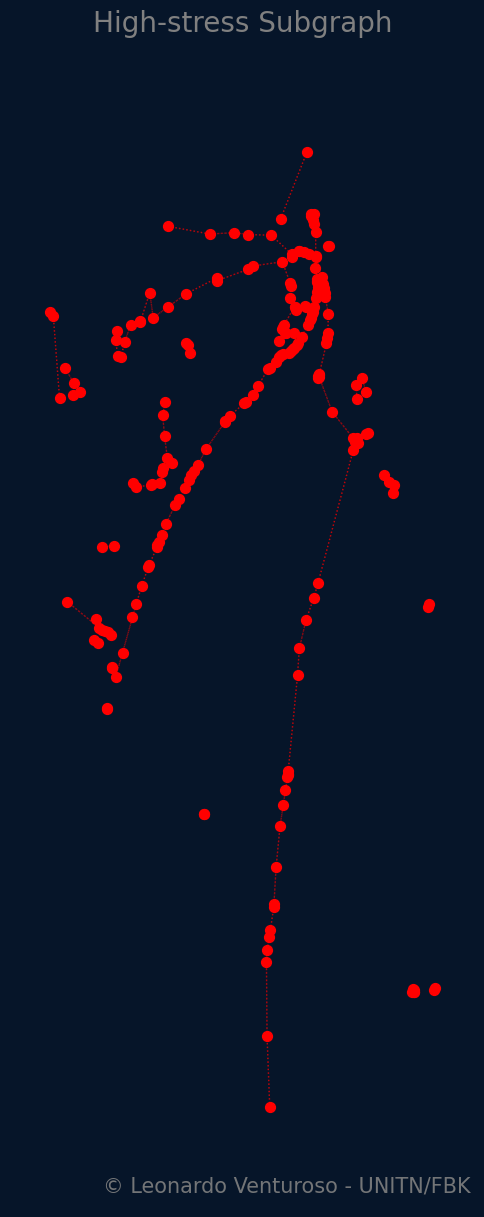

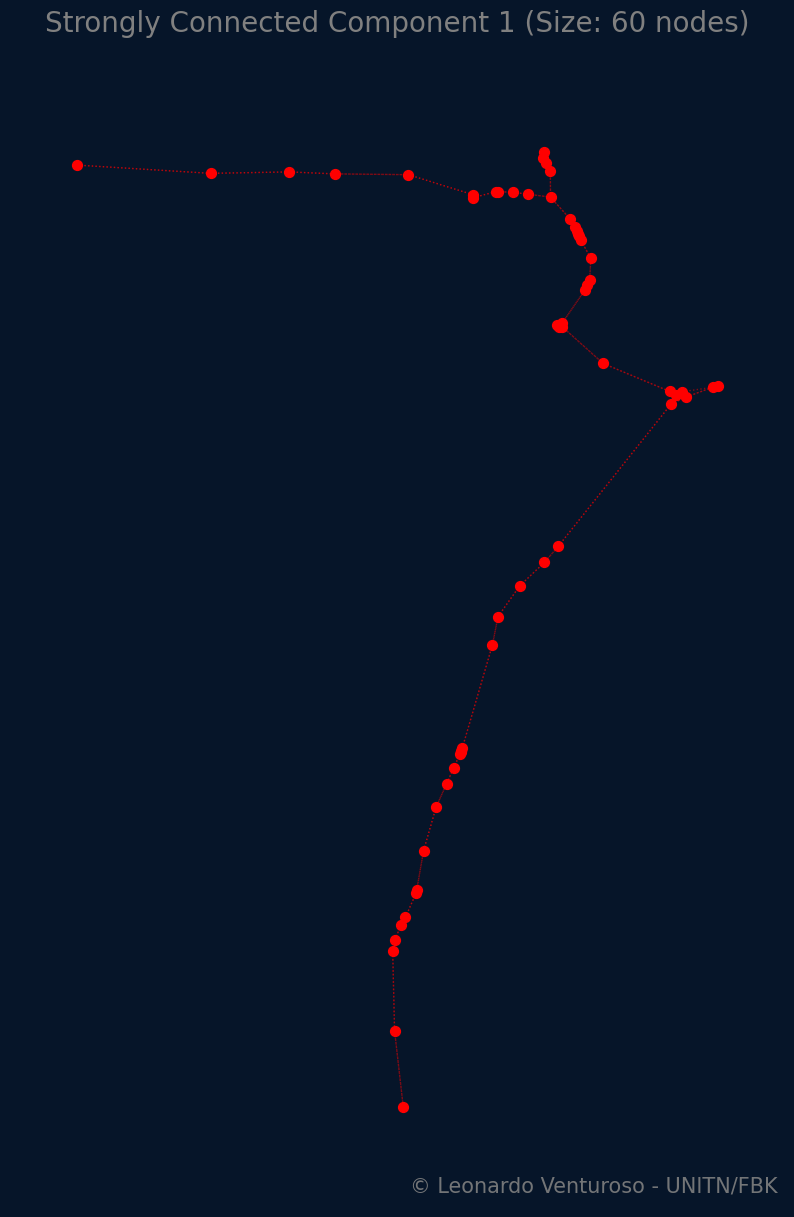

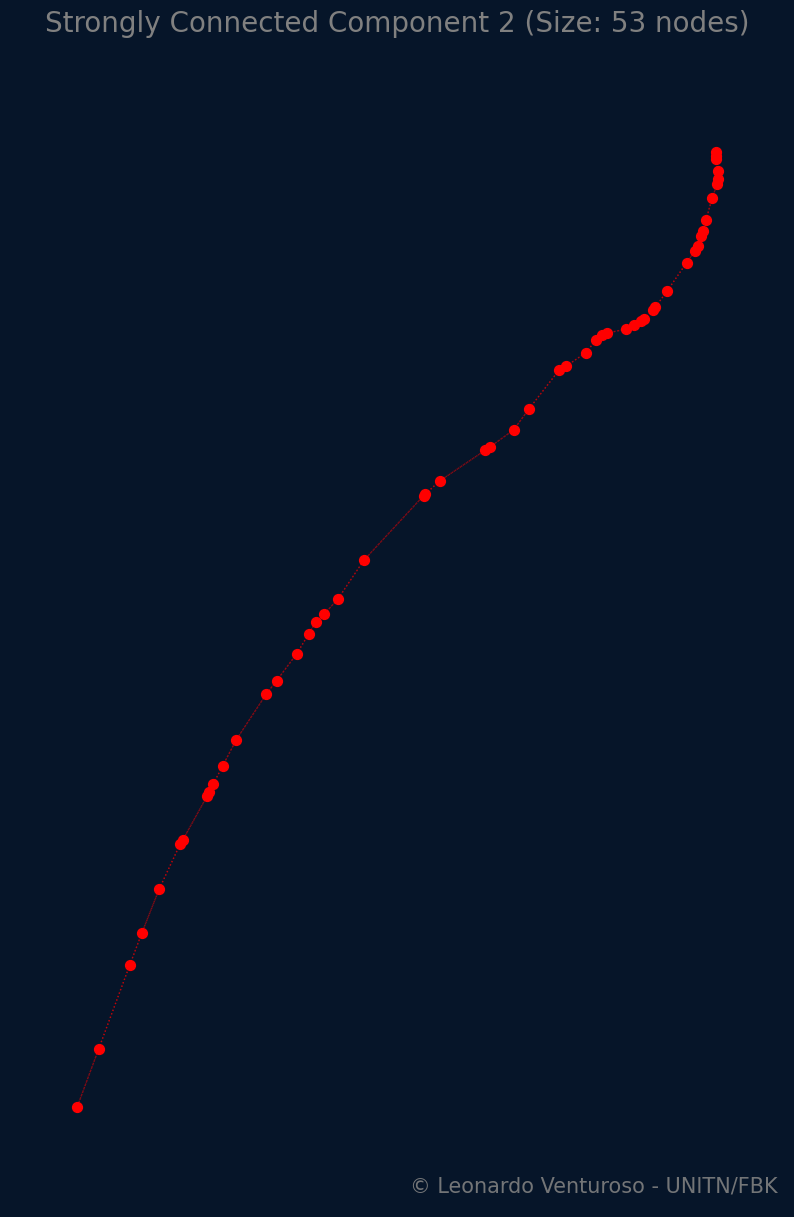

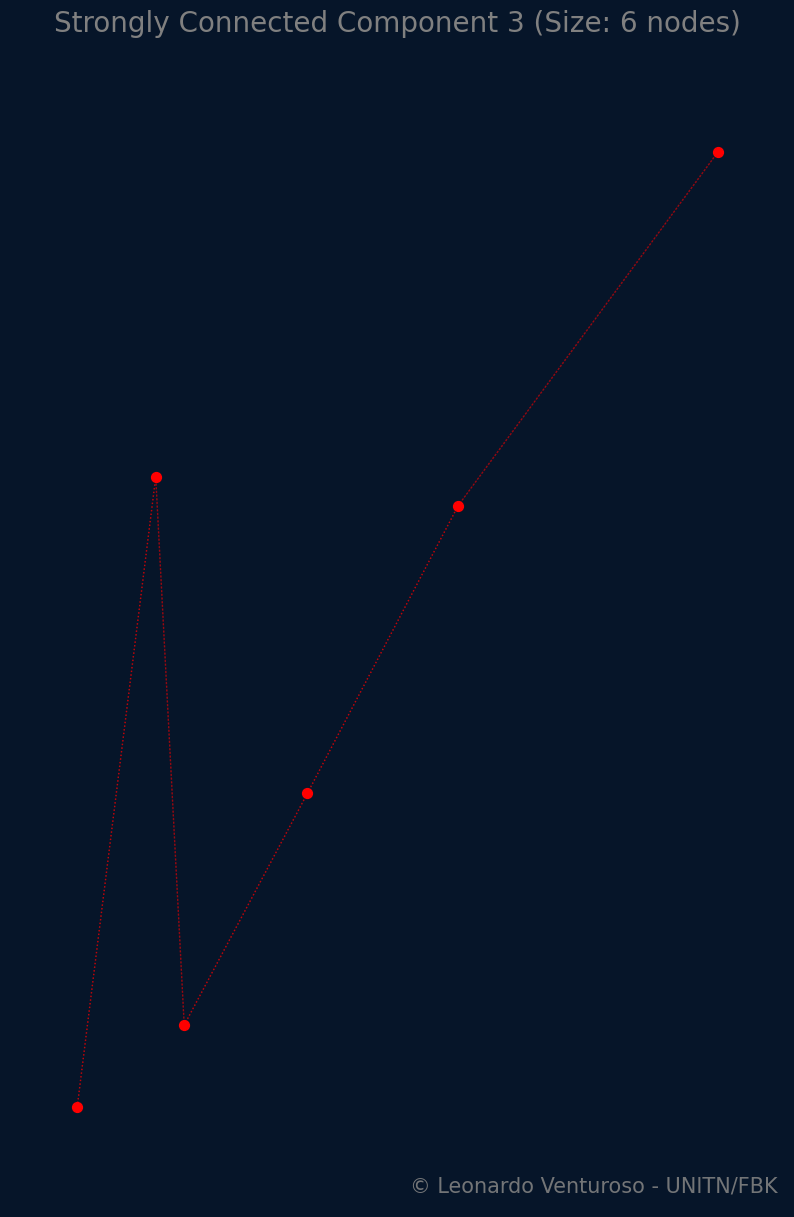

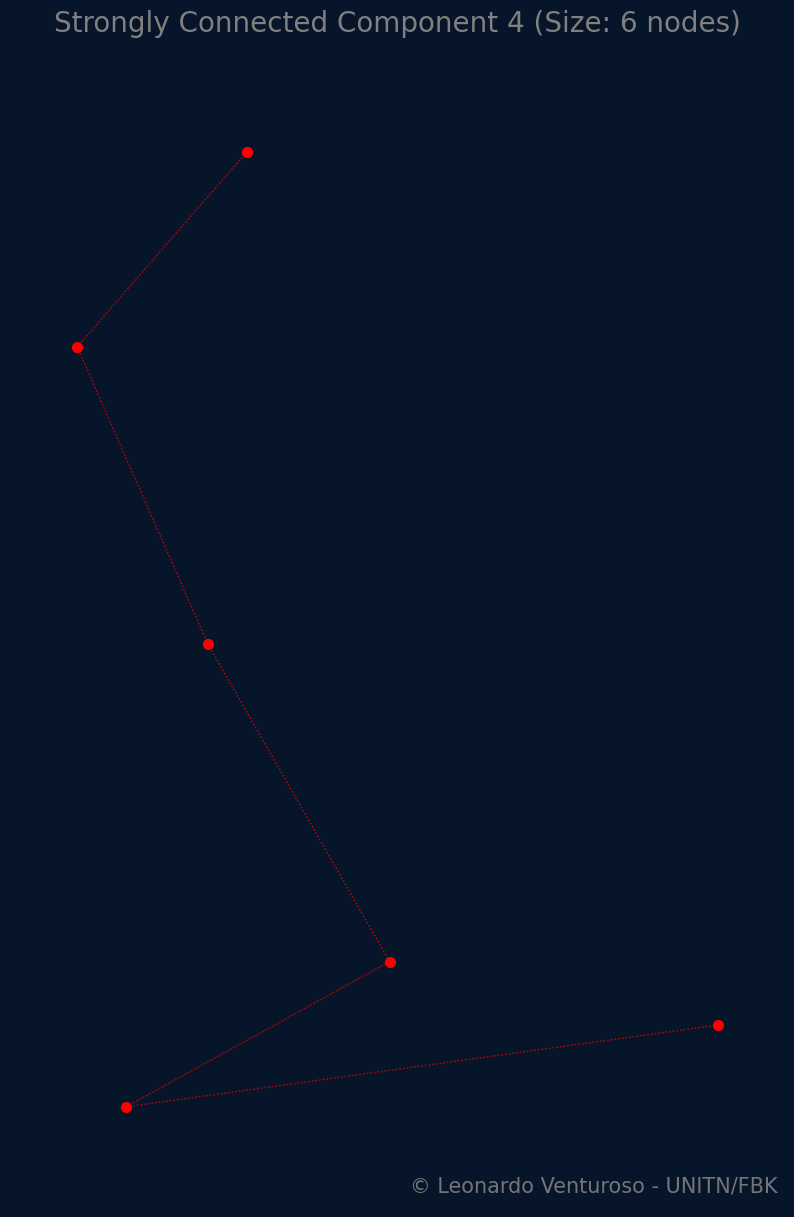

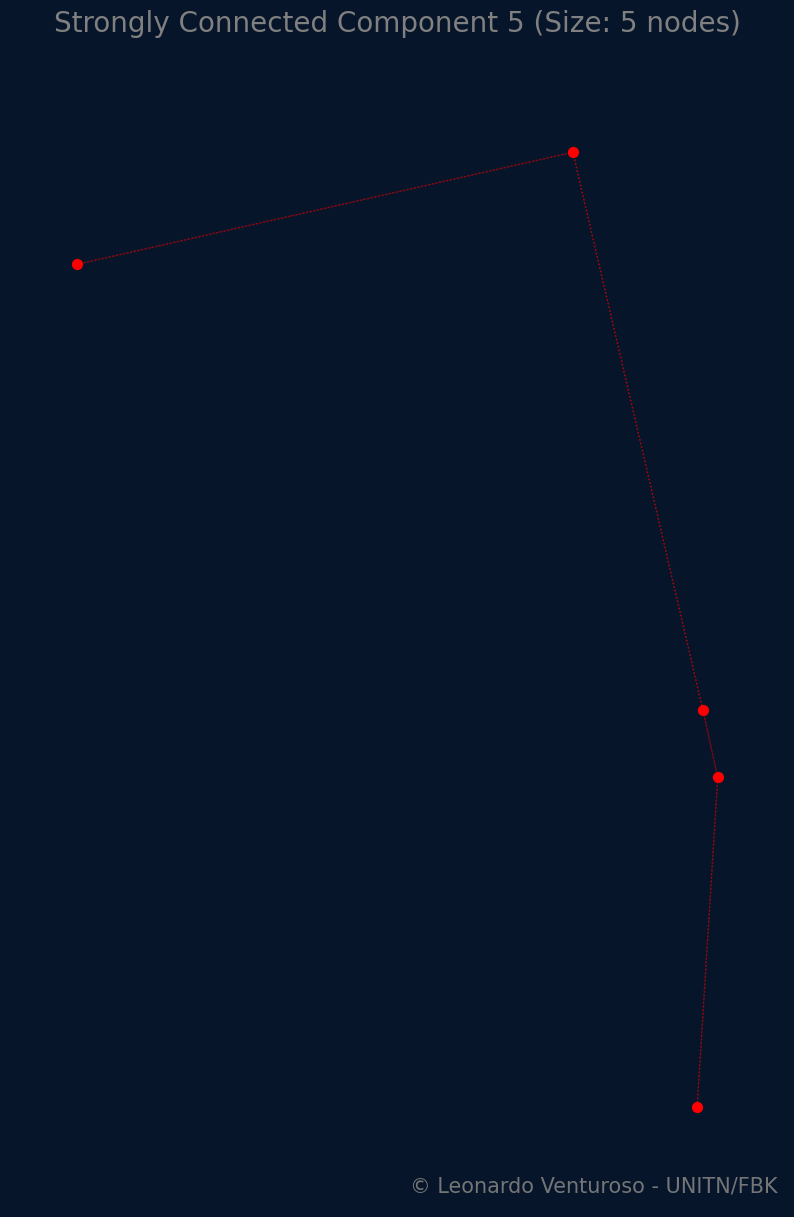

In [71]:
## Graphs for visualizing the SCC and high-stress subgraphs.
 
# # Function to visualize the largest component/subgraph
# def visualize_largest_component(components, G, title):
#     # Get the largest component
#     largest_comp = max(components, key=len)
#     subgraph = G.subgraph(largest_comp)
    
#     # Use geographical coordinates for positioning
#     pos = {node: (data['x'], data['y']) for node, data in subgraph.nodes(data=True)}
    
#     plt.figure(figsize=(12, 12))
#     nx.draw(subgraph, pos, with_labels=False, node_size=500, node_color="skyblue", font_size=10, width=1.5)
#     plt.title(title)
#     plt.show()

# # Visualize the largest SCC
# visualize_largest_component(sccs, G_lts, 'Largest Strongly Connected Component')

# # Visualize the largest High-Stress Subgraph
# visualize_largest_component(high_stress_subgraphs, G_high_stress, 'Largest High-Stress Subgraph')


def visualize_high_stress_subgraph(subgraph):
    """
    Visualizes the high-stress subgraph with a specified style.
    """
    # Use geographical coordinates for positioning
    pos = {node: (data['x'], data['y']) for node, data in subgraph.nodes(data=True)}

    # Figure setup
    fig, ax = plt.subplots(figsize=(6, 15))
    ax.set_facecolor("#061529")
    fig.set_facecolor("#061529")

    # Draw nodes and edges
    nx.draw_networkx_nodes(G=subgraph, pos=pos, node_color="red", alpha=1, node_size=50)
    nx.draw_networkx_edges(G=subgraph, pos=pos, edge_color='red', style="dotted", alpha=0.5, arrows=False)

    # Labeling Axes
    ax.set_title("High-stress Subgraph", fontdict={"fontsize": 20, "color": "grey"}, pad=15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Leonardo Venturoso - UNITN/FBK',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha=0.9)

    plt.show()

def visualize_largest_strongly_connected_components(components, G, n=5):
    """
    Visualizes the top n largest strongly connected components of the graph with a specified style.
    """
    # Sort the components by size in descending order
    sorted_components = sorted(components, key=len, reverse=True)

    # Use geographical coordinates for positioning
    pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

    for i, component in enumerate(sorted_components[:n]):
        subgraph = G.subgraph(component)

        # Figure setup
        fig, ax = plt.subplots(figsize=(10, 15))
        ax.set_facecolor("#061529")
        fig.set_facecolor("#061529")

        # Draw nodes and edges
        nx.draw_networkx_nodes(G=subgraph, pos=pos, node_color="red", alpha=1, node_size=50)
        nx.draw_networkx_edges(G=subgraph, pos=pos, edge_color='red', style="dotted", alpha=0.5, arrows=False)

        # Labeling Axes
        ax.set_title(f"Strongly Connected Component {i + 1} (Size: {len(component)} nodes)", fontdict={"fontsize": 20, "color": "grey"}, pad=15)
        ax.axis('off')

        # Watermark
        ax.text(0.99, 0.01, '© Leonardo Venturoso - UNITN/FBK',
                verticalalignment='bottom',
                horizontalalignment='right',
                transform=ax.transAxes,
                color='grey',
                fontsize=15,
                alpha=0.9)

        plt.show()

visualize_high_stress_subgraph(G_high_stress)
visualize_largest_strongly_connected_components(high_stress_subgraphs, G_high_stress)

In [ ]:
## Next Analysis points:

## 1)
## LTS Cluster Analysis:
## Use clustering algorithms to identify clusters of high-stress and low-stress areas in the network. 
## This can help in urban planning and targeted infrastructure improvements.

## 2)
## Calculate shortest paths 
## Calculate shortest paths that avoid high-stress roads or intersections. This can be useful for route planning for vulnerable road users like cyclists.
## Identify the difference in distance or time between the absolute shortest path and the lowest LTS path.

## 3)
## LTS Bottlenecks:
## Identify nodes or edges that, if their LTS were improved, would have the most significant impact on improving the overall network's LTS.

## 4)
## Edge Connectivity and LTS:
## Analyze how well-connected high LTS roads are to lower LTS roads. This can provide insights into potential areas 
## for improvement to create safer transitions for road users.

## 5)
## LTS and Incident Analysis:
## If incident or accident data is available, analyze the correlation between high LTS values and 
## the frequency or severity of incidents.

## optional)
## LTS Resilience Analysis:
## Analyze the network's resilience by simulating the closure of certain roads (e.g., due to construction or accidents) 
## and observing the impact on overall LTS. 